In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
dataset=pd.read_csv('datafinal.csv')

In [3]:
dataset['Time']=pd.to_datetime(dataset['Time'])

In [4]:
dataset['Day']=dataset['Time'].dt.day
dataset['Month']=dataset['Time'].dt.month
dataset['Hour']=dataset['Time'].dt.hour
dataset['Minute']=dataset['Time'].dt.minute
dataset=dataset.drop(['Time'],axis=1)

In [5]:
dataset

,Generation_kW,FREQ,WP_AVG,TEMP_AVG,WS_AVG_10M,WS_AVG_50M,WS_AVG_80M,WS_AVG_100M,Day,Month,Hour,Minute
0,139950.47,50.1537,1004.871333,7.133333,4.154667,7.131333,8.928000,9.783000,1,1,0,0
1,147199.00,49.9505,1004.693000,7.033333,3.750333,6.916667,8.825000,9.665333,1,1,0,15
2,150222.60,49.9242,1005.084333,6.900000,4.037333,7.281333,9.008000,9.608667,1,1,0,30
3,153285.87,50.0297,1004.924333,6.800000,4.755667,7.660000,9.580667,9.902333,1,1,0,45
4,158134.67,50.0240,1005.084333,6.633333,4.974333,7.651667,10.064000,10.355667,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,165488.13,50.0015,999.200000,23.300000,4.264333,9.217000,10.481667,9.910667,31,12,22,45
35036,163082.27,50.0344,999.164333,23.266667,4.548333,9.294000,10.707000,10.552333,31,12,23,0
35037,160880.20,50.0203,1006.933333,23.600000,4.146000,9.225667,10.584000,10.312667,31,12,23,15
35038,157473.93,50.0402,1006.880000,23.400000,3.547333,9.076667,10.519000,10.234333,31,12,23,30


In [6]:
## seperating the dataset of 31st dec,2019 
df=dataset.iloc[:34945,]
df_prediction=dataset.iloc[34945:,]

In [7]:
print(df.shape)

(34945, 12)


In [8]:
print(df_prediction.shape)

(95, 12)


In [9]:
## using the dataset till 30th dec for training and testing
df_train=df.iloc[: int(len(df)*0.9)]
df_test=df.iloc[int(len(df)*0.9):]

In [10]:
print(df_train.shape)
print(df_test.shape)

(31450, 12)
(3495, 12)


In [11]:
x=df_train.drop(['Generation_kW'],axis=1).values
y=df_train['Generation_kW'].values

In [12]:
print(x.shape)
print(y.shape)

(31450, 11)
(31450,)


In [13]:
from tensorflow import keras

In [14]:
model=keras.models.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
  
    keras.layers.Dense(11,activation='relu'),
    keras.layers.Dense(1,activation='relu')
])
model.compile(optimizer='adam',metrics='mean_squared_error',loss='mean_squared_error')
model.fit(x,y,epochs=100)

Epoch 1/100
983/983 [==============================] - 1s 692us/step - loss: 3850409728.0000 - mean_squared_error: 3850409728.0000
Epoch 2/100
983/983 [==============================] - 1s 527us/step - loss: 2232796416.0000 - mean_squared_error: 2232796416.0000
Epoch 3/100
983/983 [==============================] - 0s 484us/step - loss: 2222894080.0000 - mean_squared_error: 2222894080.0000
Epoch 4/100
983/983 [==============================] - 0s 489us/step - loss: 2213048576.0000 - mean_squared_error: 2213048576.0000
Epoch 5/100
983/983 [==============================] - 1s 506us/step - loss: 2202808832.0000 - mean_squared_error: 2202808832.0000
Epoch 6/100
983/983 [==============================] - 0s 487us/step - loss: 2191873024.0000 - mean_squared_error: 2191873024.0000
Epoch 7/100
983/983 [==============================] - 0s 482us/step - loss: 2180143616.0000 - mean_squared_error: 2180143616.0000
Epoch 8/100
983/983 [==============================] - 1s 527us/step - loss: 216715

983/983 [==============================] - 0s 484us/step - loss: 1516252288.0000 - mean_squared_error: 1516252288.0000
Epoch 64/100
983/983 [==============================] - 0s 464us/step - loss: 1515193984.0000 - mean_squared_error: 1515193984.0000
Epoch 65/100
983/983 [==============================] - 1s 527us/step - loss: 1515262464.0000 - mean_squared_error: 1515262464.0000
Epoch 66/100
983/983 [==============================] - 1s 570us/step - loss: 1514849664.0000 - mean_squared_error: 1514849664.0000
Epoch 67/100
983/983 [==============================] - 0s 482us/step - loss: 1514076800.0000 - mean_squared_error: 1514076800.0000
Epoch 68/100
983/983 [==============================] - 0s 478us/step - loss: 1514261248.0000 - mean_squared_error: 1514261248.0000
Epoch 69/100
983/983 [==============================] - 0s 479us/step - loss: 1514241920.0000 - mean_squared_error: 1514241920.0000
Epoch 70/100
983/983 [==============================] - 1s 559us/step - loss: 1514067712.

In [15]:
## using the test set to calculate mae,mse,rmse
pred=df_test.drop(['Generation_kW'],axis=1).values

In [16]:
pred=model.predict(pred)

In [17]:
df_test['pred']=pred

<ipython-input-17-24bc7c8dacb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred']=pred


<AxesSubplot:>

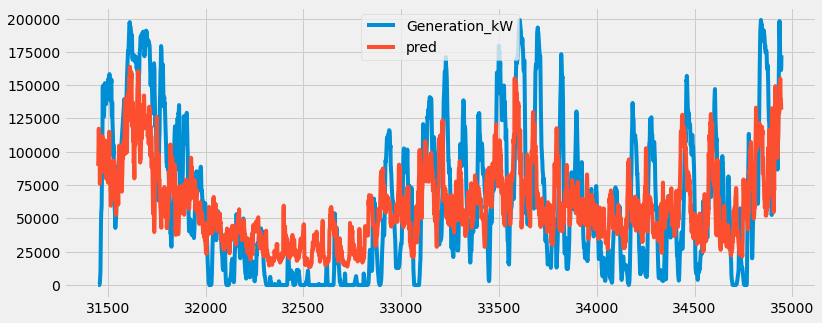

In [18]:
df_test[['Generation_kW','pred']].plot(figsize=(12,5))

In [19]:
from sklearn.metrics import *

In [20]:
print(mean_absolute_error(df_test['Generation_kW'],df_test['pred']))
print(mean_squared_error(df_test['Generation_kW'],df_test['pred']))

34806.99458725635
1878392923.5588949


In [21]:
## now predicting the value of 31 st dec and plotting on graph
pred=df_prediction.drop(['Generation_kW'],axis=1).values

In [22]:
pred=model.predict(pred)

In [23]:
df_prediction['pred']=pred

<ipython-input-23-d79a8189fd26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prediction['pred']=pred


<AxesSubplot:>

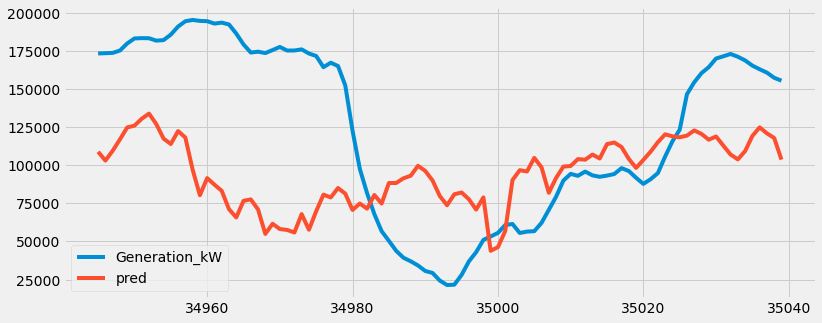

In [24]:
df_prediction[['Generation_kW','pred']].plot(figsize=(12,5))

In [25]:
## mae,mse,rmse on 31st dec

In [26]:
print(mean_absolute_error(df_prediction['Generation_kW'],df_prediction['pred']))
print(mean_squared_error(df_prediction['Generation_kW'],df_prediction['pred']))
print(np.sqrt(mean_squared_error(df_prediction['Generation_kW'],df_prediction['pred'])))

53171.83415296051
4050324692.1835675
63642.161278381864
